In [153]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio
from scipy.interpolate import UnivariateSpline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
%matplotlib inline

In [154]:
hits_temp = sio.loadmat('/Volumes/wissen/cocoanlab Dropbox/projects/bmrk5/rsfc/temp_data/mat_data/hits_fig2.mat')

In [155]:
hits_none_included_temp = sio.loadmat('/Volumes/wissen/cocoanlab Dropbox/projects/bmrk5/rsfc/temp_data/mat_data/hits_none_included_fig2.mat')

In [156]:
hits_v7_temp = sio.loadmat('/Volumes/wissen/cocoanlab Dropbox/projects/bmrk5/rsfc/temp_data/mat_data/hits_v7_fig2.mat')

In [157]:
hits_none_001 = hits_none_included_temp['hits_none_thresh_001']

In [158]:
hits_v7 = hits_v7_temp['hits']

In [159]:
emotions = ['content', 'amuse', 'surprise', 'fear', 'angry', 'sad', 'neutral']
emotions_none = emotions + ['none']

In [160]:
emotions_none

['content', 'amuse', 'surprise', 'fear', 'angry', 'sad', 'neutral', 'none']

In [161]:
hits = hits_temp['hits']

In [162]:
hits = pd.DataFrame(hits, columns = emotions)
hits_none_001 = pd.DataFrame(hits_none_001, columns= emotions_none)
hits_v7 = pd.DataFrame(hits_v7, columns = emotions)

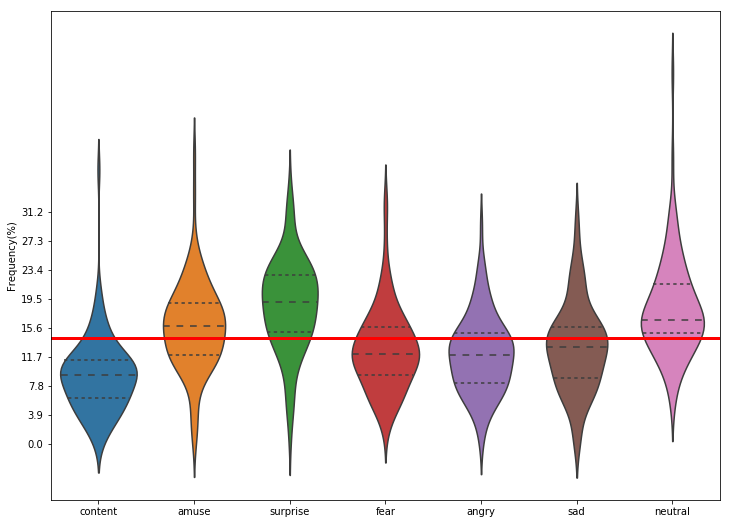

In [163]:
plt.figure(figsize=(12, 9))
plt.plot(range(-20, 100, 2), [100/7]*60, color ='red', linewidth = 3)
plt.ylabel('Frequency(%)')
plt.yticks(np.arange(0, 31.5, 3.9))
sns.violinplot(data = hits / 914 * 100, inner = 'quartile')

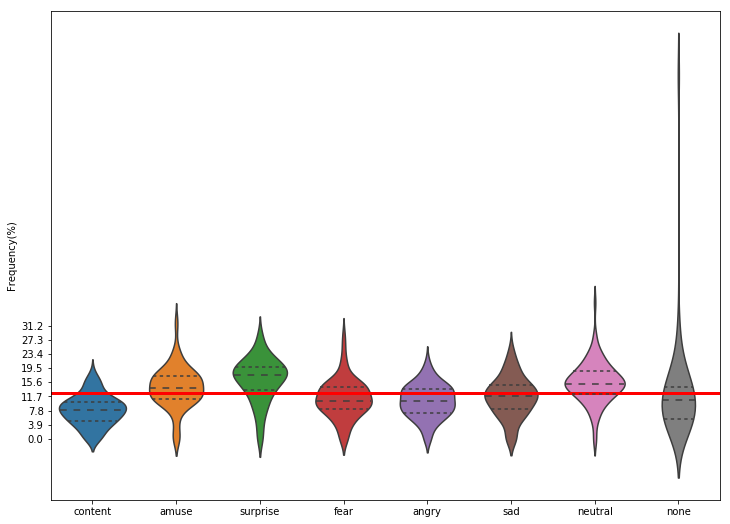

In [164]:
plt.figure(figsize=(12, 9))
plt.plot(range(-20, 100, 2), [100/8]*60, color ='red', linewidth = 3)
plt.ylabel('Frequency(%)')
plt.yticks(np.arange(0, 31.5, 3.9))
sns.violinplot(data = hits_none_001 / 914 * 100, inner = 'quartile')

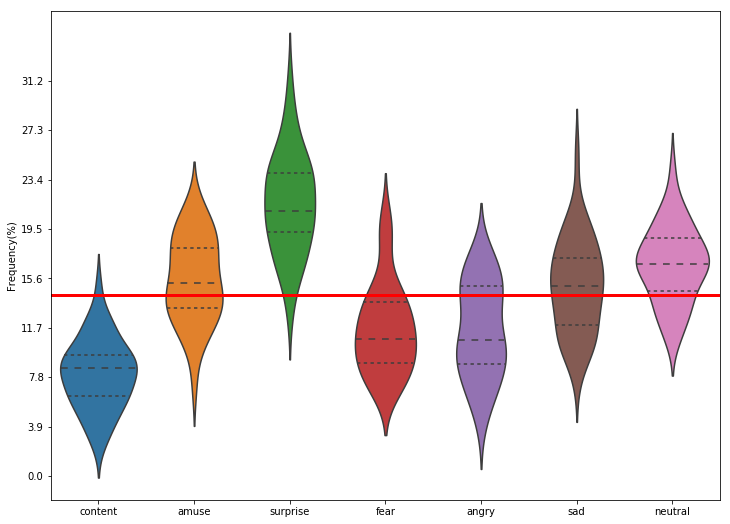

In [165]:
plt.figure(figsize=(12, 9))
plt.plot(range(-20, 100, 2), [100/7]*60, color ='red', linewidth = 3)
plt.ylabel('Frequency(%)')
plt.yticks(np.arange(0, 31.5, 3.9))
sns.violinplot(data = hits_v7 / 914 * 100, inner = 'quartile')

In [166]:
matrices_temp = sio.loadmat('/Volumes/wissen/cocoanlab Dropbox/projects/bmrk5/rsfc/temp_data/mat_data/emo_matrices_fig3.mat')

In [167]:
matrices_temp.keys()

dict_keys(['__header__', '__version__', '__globals__', 'amuse_matrix', 'angry_matrix', 'content_matrix', 'fear_matrix', 'neutral_matrix', 'sad_matrix', 'surprise_matrix'])

In [168]:
matrices = {e:[] for e in emotions}
for i in matrices.keys():
    for j in matrices_temp.keys():
        if i in j:
            matrices[i] = matrices_temp[j]

emotions = list(matrices.keys())

In [169]:
matrices['content'].shape

(93, 914)

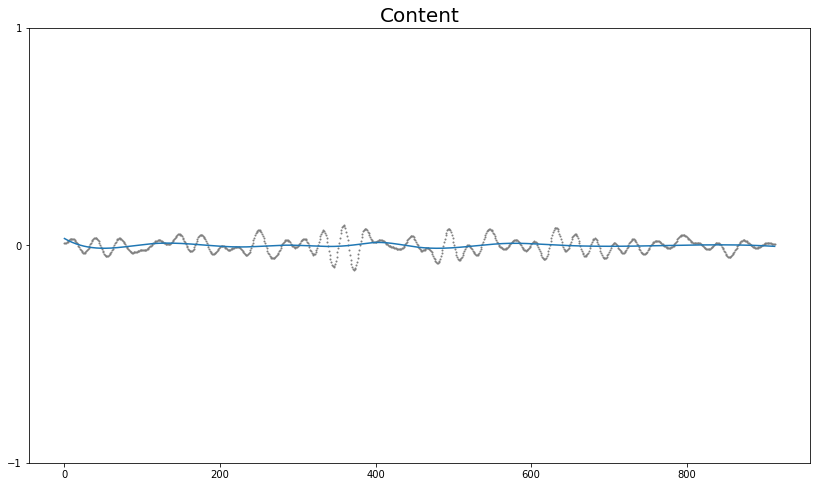

In [170]:
x = range(914)
y = np.mean(matrices[list(matrices.keys())[0]], axis = 0)
s = UnivariateSpline(x, y, s=1)
xs = range(914)
ys = s(xs)

plt.figure(figsize = (14, 8))
plt.scatter(x, y, c = 'grey', s = 1)
plt.yticks([-1, 0, 1])
plt.ylim([-1, 1])
plt.grid(False)
plt.title('Content', fontsize = 20)
plt.plot(xs, ys)

In [185]:
list(matrices.keys())

['content', 'amuse', 'surprise', 'fear', 'angry', 'sad', 'neutral']

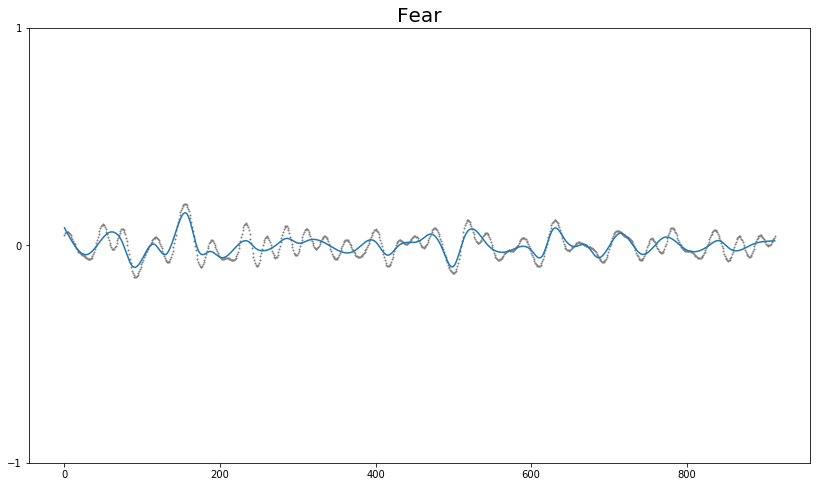

In [186]:
x = range(914)
y = np.mean(matrices[list(matrices.keys())[3]], axis = 0)
s = UnivariateSpline(x, y, s=1)
xs = range(914)
ys = s(xs)

plt.figure(figsize = (14, 8))
plt.scatter(x, y, c = 'grey', s = 1)
plt.yticks([-1, 0, 1])
plt.ylim([-1, 1])
plt.grid(False)
plt.title('Fear', fontsize = 20)
plt.plot(xs, ys)

In [136]:
kragel = pd.read_excel('/Volumes/wissen/cocoanlab Dropbox/projects/bmrk5/rsfc/temp_data/journal.pbio.2000106.s006.XLSX', sheet_name = 'Fig3', index_col = 0)

In [172]:
kragel_content = kragel.iloc[:, 0:256]
kragel_amuse = kragel.iloc[:, 257:513]
kragel_surprise = kragel.iloc[:, 514:514+256]
kragel_fear = kragel.iloc[:,514+256+1:514+256+1+256]
kragel_anger = kragel.iloc[:, 514+256+1+256+1:514+256+1+256+1+256]
kragel_sad = kragel.iloc[:, 514+256+1+256+1+256+1:514+256+1+256+1+256+1+256]
kragel_neutral = kragel.iloc[:, 514+256+1+256+1+256+1+256+1:514+256+1+256+1+256+1+256+1+256]

Text(0.5, 1.0, 'Content')

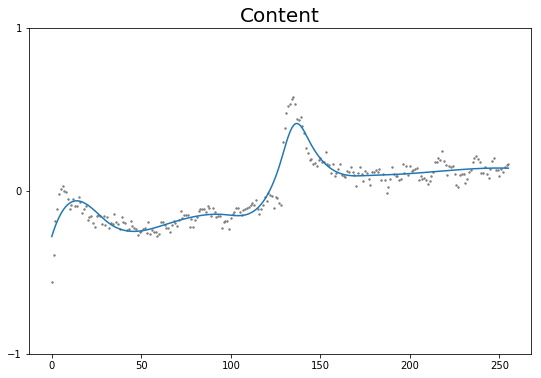

In [173]:
x = range(256)
y = np.mean(kragel_content, axis = 0)
s = UnivariateSpline(x, y, s=1)
xs = range(256)
ys = s(xs)
plt.figure(figsize = (9, 6))
plt.scatter(x, y, c = 'grey', s = 2)
plt.ylim([-1, 1])
plt.yticks([-1, 0, 1])
plt.grid(False)
plt.plot(xs, ys)
plt.title('Content', fontsize = 20)

Text(0.5, 1.0, 'Amuse')

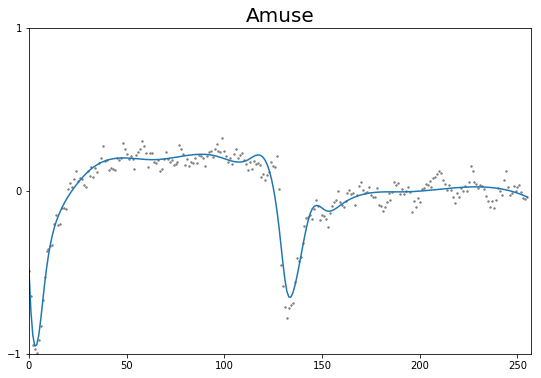

In [174]:
x2 = range(256)
y2 = np.mean(kragel_amuse, axis = 0)
s2 = UnivariateSpline(x2, y2, s=1)
ys2 = s2(x2)
plt.figure(figsize = (9, 6))
plt.plot(x2, ys2)
plt.scatter(x2, y2, c = 'grey', s = 2)
plt.ylim([-1, 1])
plt.yticks([-1, 0, 1])
plt.xlim([0, 257])
plt.grid(False)
plt.title('Amuse', fontsize = 20)

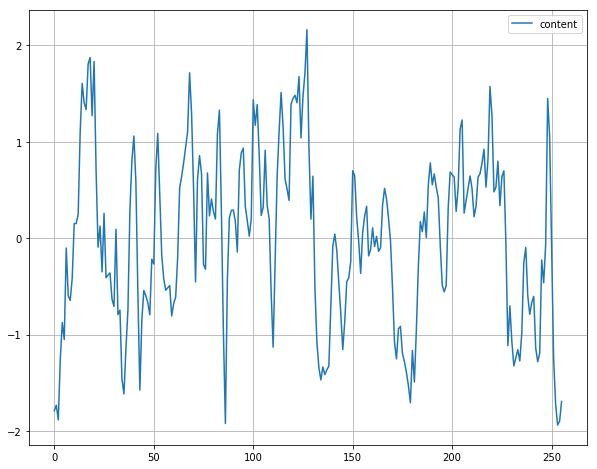

In [187]:
x = [kragel_content, kragel_amuse, kragel_surprise, kragel_fear, kragel_anger, kragel_sad, kragel_neutral]
plt.figure(figsize = (10,8))
plt.grid(True)
plt.yticks(range(-6,6))
plt.plot(range(256), x[0].iloc[0, :])
plt.legend(emotions)

In [176]:
emotions = list(matrices.keys())
emotions

['content', 'amuse', 'surprise', 'fear', 'angry', 'sad', 'neutral']

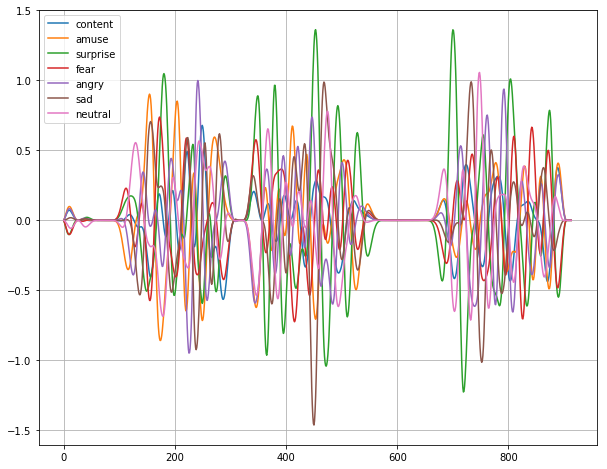

In [196]:
plt.figure(figsize = (10, 8))
plt.grid(True)
for i in range(7):
    plt.plot(matrices[emotions[i]][0, :])
plt.legend(emotions)

In [178]:
matrices_v7_temp = sio.loadmat('/Volumes/wissen/cocoanlab Dropbox/projects/bmrk5/rsfc/temp_data/mat_data/emo_v7_matrices_fig3.mat')

In [179]:
matrices_v7_temp.keys()

dict_keys(['__header__', '__version__', '__globals__', 'amuse_matrix', 'angry_matrix', 'content_matrix', 'fear_matrix', 'neutral_matrix', 'sad_matrix', 'surprise_matrix'])

In [180]:
emotions

['content', 'amuse', 'surprise', 'fear', 'angry', 'sad', 'neutral']

In [181]:
matrices_v7 = {e:[] for e in emotions}
for i in matrices_v7.keys():
    for j in matrices_v7_temp.keys():
        if i in j:
            matrices_v7[i] = matrices_v7_temp[j]

In [182]:
matrices_v7['content'].shape

(39, 914)

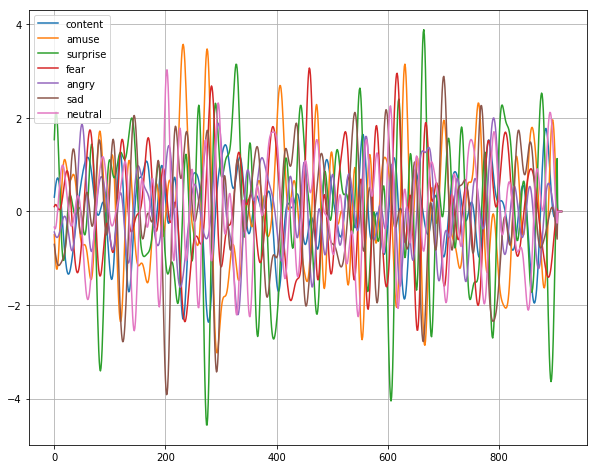

In [183]:
plt.figure(figsize = (10, 8))
plt.grid(True)
for i in range(7):
    plt.plot(matrices_v7[emotions[i]][0, :])
plt.legend(emotions)

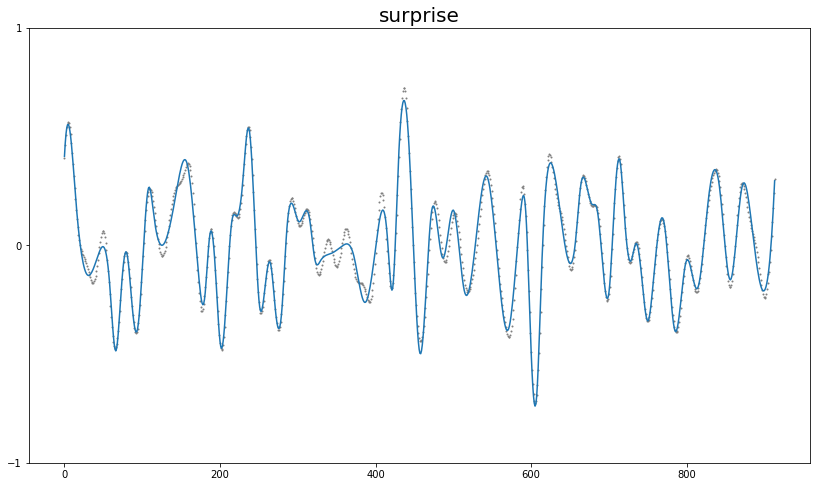

In [184]:
# with v7...
x = range(914)
y = np.mean(matrices_v7[list(matrices_v7.keys())[2]], axis = 0)
s = UnivariateSpline(x, y, s=1)
xs = range(914)
ys = s(xs)

plt.figure(figsize = (14, 8))
plt.scatter(x, y, c = 'grey', s = 1)
plt.yticks([-1, 0, 1])
plt.ylim([-1, 1])
plt.grid(False)
plt.title(list(matrices_v7.keys())[2], fontsize = 20)
plt.plot(xs, ys)